### this file is used to normalize the data 

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler #MinMax normalization is being used here

In [8]:
# Load the data
train_df = pd.read_csv("../0DATA_SELECTION/CSV_data/train_data.csv")
test_df = pd.read_csv("../0DATA_SELECTION/CSV_data/test_data.csv")

In [9]:
# Separate labels and pixel data
train_labels = train_df.iloc[:, 0]
train_images = train_df.iloc[:, 1:]

test_labels = test_df.iloc[:, 0]
test_images = test_df.iloc[:, 1:]

In [10]:
# Normalize pixel values (0-255 -> 0-1)
scaler = MinMaxScaler()
train_images = pd.DataFrame(scaler.fit_transform(train_images))
test_images = pd.DataFrame(scaler.transform(test_images))

In [11]:
# Recombine labels with normalized images
processed_train_df = pd.concat([train_labels, train_images], axis=1)
processed_test_df = pd.concat([test_labels, test_images], axis=1)

In [12]:
# Save preprocessed data
processed_train_df.to_csv("Processed_CSV/preprocessed_train.csv", index=False)
processed_test_df.to_csv("Processed_CSV/preprocessed_test.csv", index=False)

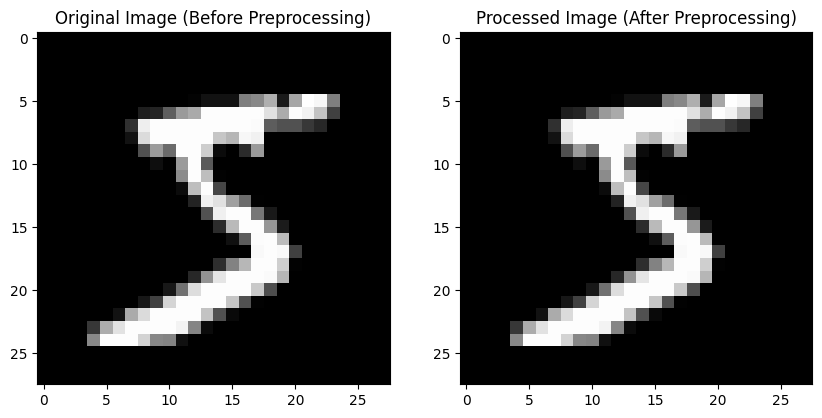

In [13]:
# Display a sample image before and after normalization
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image (Reshape first row into 28x28 grid)
axes[0].imshow(train_df.iloc[0, 1:].values.reshape(28, 28), cmap='gray')
axes[0].set_title("Original Image (Before Preprocessing)")

# Processed Image
axes[1].imshow(processed_train_df.iloc[0, 1:].values.reshape(28, 28), cmap='gray')
axes[1].set_title("Processed Image (After Preprocessing)")

plt.show()